In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycytominer import aggregate, annotate, normalize, feature_select, cyto_utils
from cytominer_eval import evaluate
from cytominer_eval.transform import metric_melt
from pycytominer.cyto_utils import infer_cp_features
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
batch = pd.read_csv('/Users/mbornhol/git/neural-profiling/baseline/01_data/level_3_data/sub_level3.csv')
b = batch[['Metadata_Batch_Number', 'Metadata_Plate', 'Metadata_Well']]

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (8,9,16,17,18,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
n = '813'
df = pd.read_csv(f"/Users/mbornhol/git/neural-profiling/training/runs/{n}/{n}_aggregated_median.csv", low_memory=False)
df = pd.merge(df, b, how="left", on=['Metadata_Plate', 'Metadata_Well'])
features = [feat for feat in df.columns if feat.startswith('eff')]
df = df.sample(frac = 1)

In [4]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features].values)
df['pca_one'] = pca_result[:,0]
df['pca_two'] = pca_result[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.04916447 0.04045904]


[]

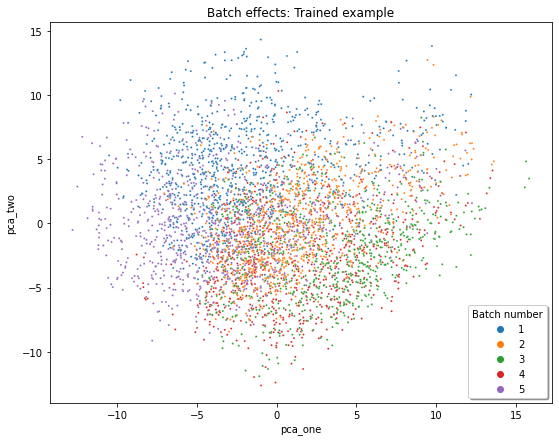

In [12]:
sub = df.sample(frac=0.5)
fig, ax = plt.subplots(figsize=(9,7))
plt.style.use({'figure.facecolor':'white'})
gfg = sns.scatterplot(data=sub, x="pca_one", y='pca_two', hue = df['Metadata_Batch_Number'], s = 4,  palette="tab10")
plt.title("Batch effects: Trained example")
plt.legend(loc = 'lower right', shadow=True, title='Batch number')
plt.plot()

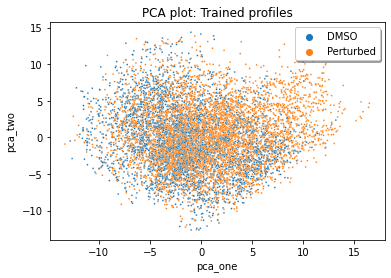

In [9]:
def is_dmso(sample):
    if sample == 'DMSO':
        return "DMSO"
    else:
        return "Perturbed"
df['DMSO'] = df.Metadata_broad_sample.apply(is_dmso)

fig, ax =plt.subplots()
plt.title("PCA plot: Trained profiles")
plt.style.use({'figure.facecolor':'white'})
gfg = sns.scatterplot(data=df, x="pca_one", y='pca_two', hue = df['DMSO'], hue_order = ["DMSO", "Perturbed"], s = 3, ax=ax, palette="tab10")
plt.legend(loc = 'upper right', shadow=True)
plt.show()
# plt.xlim(-10000, 15000)
# plt.ylim(-2000, 2000)
#plt.setp(gfg.get_legend().get_texts(), fo

# analysis

914 looks very weird. The other augmentated ones dont look that different

Explained variation per principal component: [0.0798411  0.07068512]


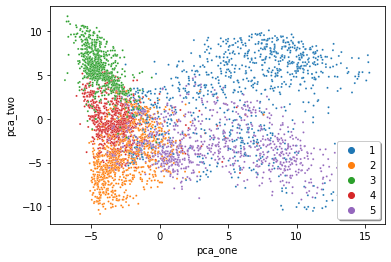

In [106]:
n = '1010'
df = pd.read_csv(f"/Users/mbornhol/git/neural-profiling/training/runs/{n}/{n}_aggregated_median.csv", low_memory=False)
df = pd.merge(df, b, how="left", on=['Metadata_Plate', 'Metadata_Well'])
features = [feat for feat in df.columns if feat.startswith('eff')]
df = df.sample(frac = 1)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features].values)
df['pca_one'] = pca_result[:,0]
df['pca_two'] = pca_result[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
sub = df.sample(frac=0.5)
plt.style.use({'figure.facecolor':'white'})
gfg = sns.scatterplot(data=sub, x="pca_one", y='pca_two', hue = df['Metadata_Batch_Number'], s = 4,  palette="tab10")
plt.legend(loc = 'lower right', shadow=True)



In [ ]:
def is_dmso(sample):
    if sample == 'DMSO':
        return 0.1
    else:
        return 0.9
df["DMSO"] = df.Metadata_broad_sample.apply(is_dmso)

In [ ]:
plt.style.use({'figure.facecolor':'white'})
gfg = sns.scatterplot(data=df, x="pca_one", y='pca_two', c = df['DMSO'], s = 3,  hue_order=['DMSO', 'Compound'])

# now normalize

In [62]:
eff_rob = normalize(
    profiles=eff,
    features=eff_features,
    samples="Metadata_broad_sample == 'DMSO'",
    method='robustize',
    output_file='none'
)

Explained variation per principal component: [0.50562739 0.10818844]


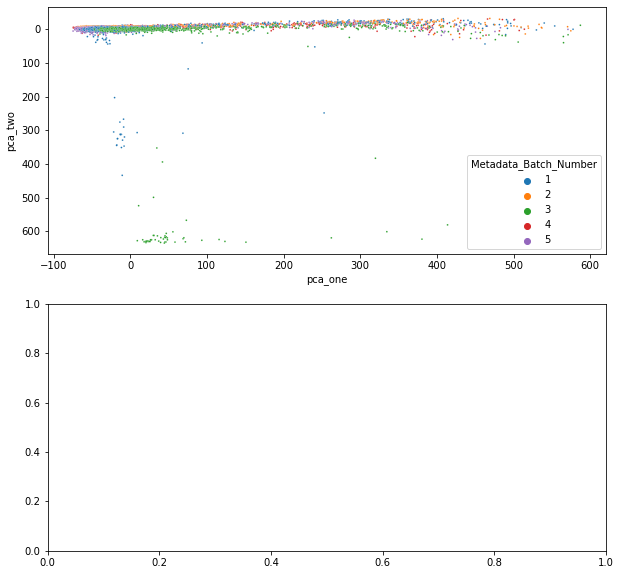

In [66]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(eff_rob[eff_features].values)
eff_rob['pca_one'] = pca_result[:,0]
eff_rob['pca_two'] = pca_result[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
fig, ax =plt.subplots(2,1, figsize=(10,10))
plt.style.use({'figure.facecolor':'white'})
gfg = sns.scatterplot(data=eff_rob, x="pca_one", y='pca_two', hue = res['Metadata_Batch_Number'], s = 3, ax=ax[0], palette="tab10")
#gfg = sns.scatterplot(data=eff, x="pca_one", y='pca_two', hue=eff["Metadata_Batch_Number"], s = 3,ax=ax[1], palette="tab10")
ax[0].invert_yaxis()

In [8]:
df[features].max()

efficientnet_0       4.444374
efficientnet_1       5.052005
efficientnet_2       5.429641
efficientnet_3       7.153739
efficientnet_4       7.286769
                       ...   
efficientnet_1275    5.756530
efficientnet_1276    6.788861
efficientnet_1277    5.220134
efficientnet_1278    5.839402
efficientnet_1279    3.789063
Length: 1280, dtype: float64

In [9]:
df[features].min()


efficientnet_0      -0.169818
efficientnet_1      -0.198908
efficientnet_2      -0.196741
efficientnet_3      -0.155951
efficientnet_4      -0.199711
                       ...   
efficientnet_1275   -0.167947
efficientnet_1276   -0.162051
efficientnet_1277   -0.176580
efficientnet_1278   -0.198361
efficientnet_1279   -0.197556
Length: 1280, dtype: float64

In [10]:
df[features].mean()


efficientnet_0       0.149491
efficientnet_1       0.148919
efficientnet_2       0.110885
efficientnet_3       0.335817
efficientnet_4       0.218449
                       ...   
efficientnet_1275    0.208826
efficientnet_1276    0.252342
efficientnet_1277    0.165382
efficientnet_1278    0.185646
efficientnet_1279    0.127204
Length: 1280, dtype: float64

(array([ 22., 172., 311., 305., 256., 131.,  57.,  18.,   2.,   6.]),
 array([-0.03455281,  0.02421285,  0.08297852,  0.14174418,  0.20050984,
         0.25927551,  0.31804117,  0.37680684,  0.4355725 ,  0.49433816,
         0.55310383]),
 <BarContainer object of 10 artists>)

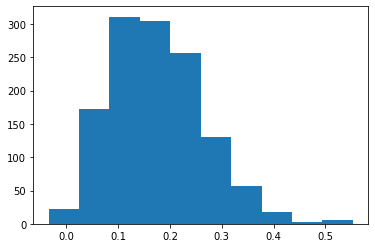

In [11]:
plt.hist(df[features].mean())